In [629]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [630]:
url = "https://raw.githubusercontent.com/Bhadiyadra-Sarthak/EECS-3401-final/main/car_web_scraped_dataset.csv"
cars = pd.read_csv(url, sep=',')

#Removing all the data before year 2021
cars = cars[(cars.year >= 2021)]

#backup of the current dataset
cars_backup = cars

In [631]:
cars

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
13,Mercedes-Benz GLC,2021,"38,760 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$29,998"
15,Honda Civic,2021,"22,850 miles","White exterior, Black interior","No accidents reported, 1 Owner","$21,998"
...,...,...,...,...,...,...
2831,Ford Escape,2022,"26,521 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$28,468"
2832,Volkswagen Tiguan,2021,"29,540 miles","Black exterior, Gray interior","No accidents reported, 1 Owner","$19,500"
2837,Mercedes-Benz GLC,2022,"27,894 miles","Gray exterior, Gray interior","No accidents reported, 2 Owners","$29,999"
2838,Honda CR-V,2021,"50,220 miles","Gray exterior, Unknown interior","No accidents reported, 1 Owner","$22,992"


In [632]:
cars.head()

,name,year,miles,color,condition,price
0,Kia Forte,2022,"41,406 miles","Gray exterior, Black interior","No accidents reported, 1 Owner","$15,988"
1,Chevrolet Silverado 1500,2021,"15,138 miles","White exterior, Black interior","1 accident reported, 1 Owner","$38,008"
2,Toyota RAV4,2022,"32,879 miles","Silver exterior, Unknown interior","No accidents reported, 1 Owner","$24,988"
13,Mercedes-Benz GLC,2021,"38,760 miles","Black exterior, Black interior","No accidents reported, 1 Owner","$29,998"
15,Honda Civic,2021,"22,850 miles","White exterior, Black interior","No accidents reported, 1 Owner","$21,998"


In [633]:
cars.describe()

,year
count,1164.000000
mean,2021.647766
std,0.802824
min,2021.000000
25%,2021.000000
50%,2021.000000
75%,2022.000000
max,2024.000000


In [634]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1164 entries, 0 to 2839
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       1164 non-null   object
 1   year       1164 non-null   int64 
 2   miles      1164 non-null   object
 3   color      1164 non-null   object
 4   condition  1164 non-null   object
 5   price      1164 non-null   object
dtypes: int64(1), object(5)
memory usage: 63.7+ KB


In [635]:
cars[['Brand', 'Model']] = cars['name'].str.split(' ', n=1, expand=True)
cars = cars.drop(columns=['name'])

In [636]:
# We will change the object type to int64 for our numerical data such as miles and prices
cars['miles'] = cars['miles'].str.strip('miles').str.replace(',','')
cars['miles'] = cars['miles'].astype('int64')

In [637]:
cars["miles"]

0       41406
1       15138
2       32879
13      38760
15      22850
        ...  
2831    26521
2832    29540
2837    27894
2838    50220
2839    26510
Name: miles, Length: 1164, dtype: int64

In [638]:
cars['price'] = cars['price'].str.replace('$', '').str.replace(',','').str.strip()
cars['price'] = cars['price'].astype('int64')

In [639]:
# Clearing color column
cars['exterior'] = cars['color'].str.extract(r'(\D+),')[0].astype(object)
cars['interior'] = cars['color'].str.extract(r',(\D+)')[0].astype(object)
cars['exterior'] = cars['exterior'].str.strip('exterior').str.replace(' ','')
cars['interior'] = cars['interior'].str.strip('interior').str.replace(' ','')
cars = cars.drop(columns=['color'])

In [640]:
# Clearnig Condition column
cars['accidents'] = cars['condition'].str.extract(r'(\d+)\s*accident').replace(np.nan,0).astype(int)
cars['previous_owners'] = cars['condition'].str.extract(r'reported,\s*(\d+)').astype(int)
cars = cars.drop(columns=['condition'])

In [641]:
# Finished dataset
cars

,year,miles,price,Brand,Model,exterior,interior,accidents,previous_owners
0,2022,41406,15988,Kia,Forte,Gray,Black,0,1
1,2021,15138,38008,Chevrolet,Silverado 1500,White,Black,1,1
2,2022,32879,24988,Toyota,RAV4,Silver,Unknown,0,1
13,2021,38760,29998,Mercedes-Benz,GLC,Black,Black,0,1
15,2021,22850,21998,Honda,Civic,White,Black,0,1
...,...,...,...,...,...,...,...,...,...
2831,2022,26521,28468,Ford,Escape,Gray,Black,0,1
2832,2021,29540,19500,Volkswagen,Tiguan,Black,Gray,0,1
2837,2022,27894,29999,Mercedes-Benz,GLC,Gray,Gray,0,2
2838,2021,50220,22992,Honda,CR-V,Gray,Unknown,0,1


In [642]:
cars.isnull().sum()

year               0
miles              0
price              0
Brand              0
Model              0
exterior           0
interior           0
accidents          0
previous_owners    0
dtype: int64

In [643]:
# Finding duplicates and droping them

cars.duplicated().sum()
cars.drop_duplicates(inplace=True)

In [649]:
cars.replace('Unknown', np.nan, inplace=True)
cars.isnull().sum()
cars['interior'].unique()

array(['Black', nan, 'Gray', 'Beige', 'Brown', 'Orange', 'Red', 'White'],
      dtype=object)

In [650]:
# To handle these null values we will be using KNN Imputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_cols = cars.select_dtypes(include='number').columns.to_list()
cat_cols = cars.select_dtypes(exclude='number').columns.to_list()

num_cols.remove('price')

numeric_transformer = make_pipeline(steps=
    ('scaler', StandardScaler())

In [645]:
# Dividing the data to For testing and training
from sklearn.model_selection import train_test_split

X = cars.drop(columns='price').values
y = np.log(cars['price'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(756, 8) (756,) (190, 8) (190,)


<function matplotlib.pyplot.show(close=None, block=None)>

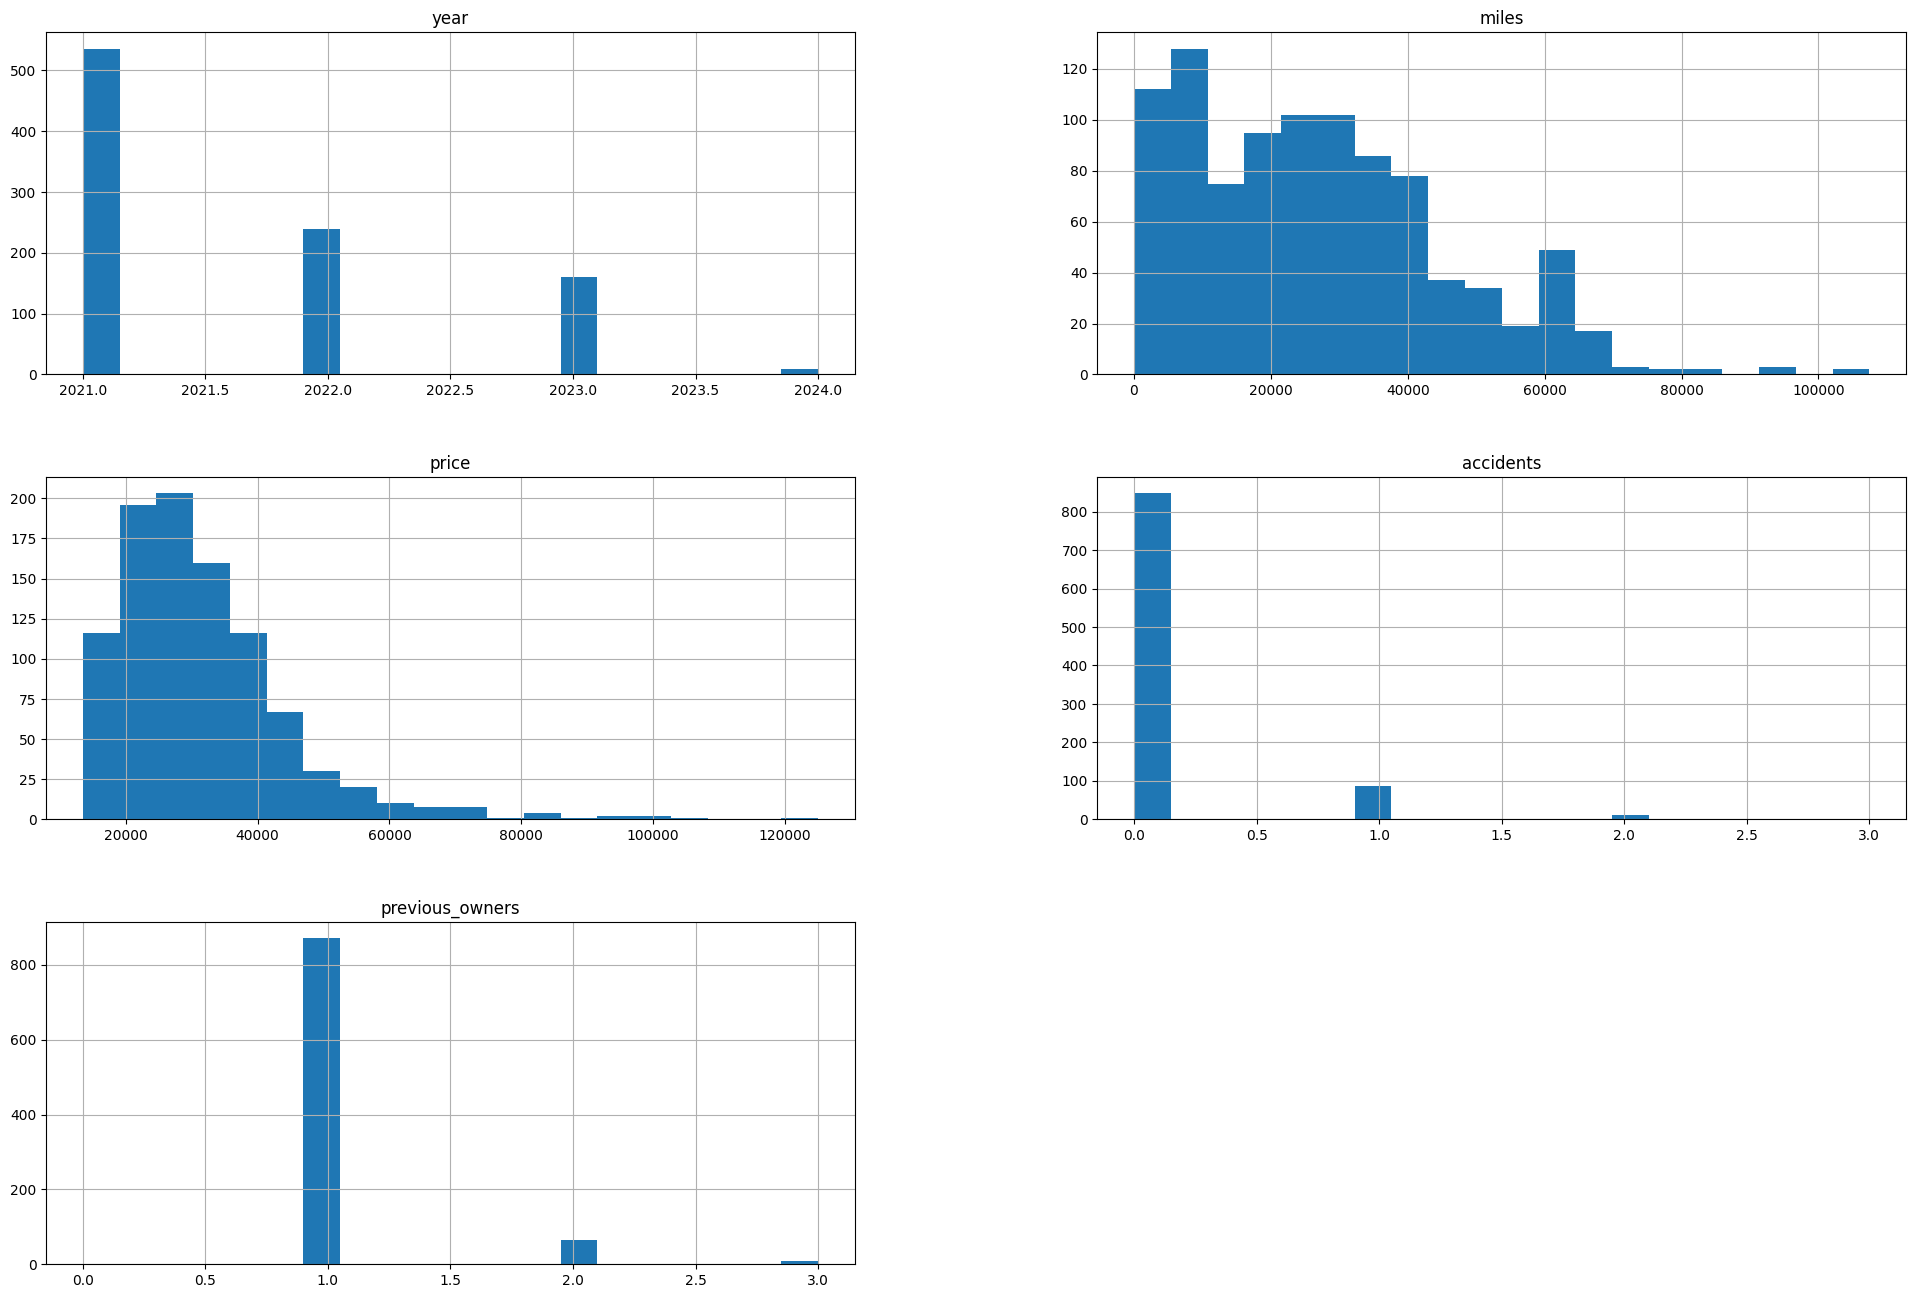

In [646]:
# Data visualizing
cars.hist(bins = 20,figsize=(24, 16))
plt.show

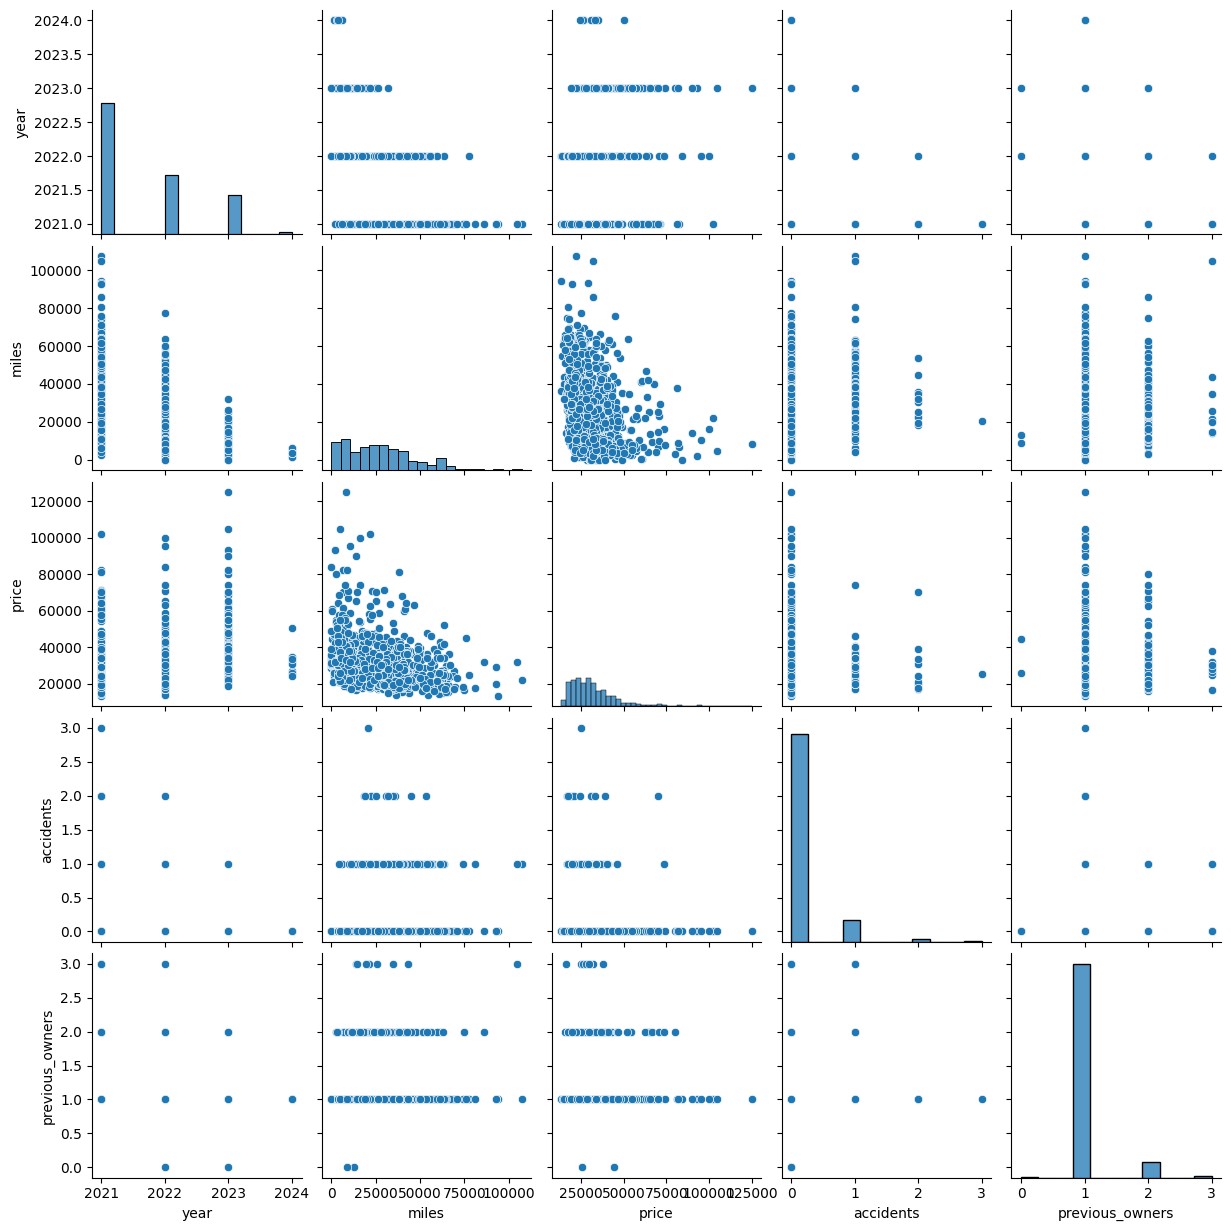

In [647]:
sns.pairplot(cars)